# Credit Card Fraud Detection

## Import Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("FraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [6]:
df.describe().sum()

Unnamed: 0    2.383295e+06
cc_num        6.728359e+18
amt           5.788542e+05
zip           8.790719e+05
lat           5.559643e+05
long          5.551444e+05
city_pop      3.873889e+06
unix_time     8.289445e+09
merch_lat     5.559644e+05
merch_long    5.551443e+05
is_fraud      5.557201e+05
dtype: float64

In [7]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.shape

(555719, 23)

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,NaN,NaN,NaN,277859.0,160422.401459,0.0,138929.5,277859.0,416788.5,555718.0
trans_date_trans_time,555719,544760,2020-12-19 16:02:22,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,555719.0,NaN,NaN,NaN,417838695528764096.0,1309836622980612608.0,60416207185.0,180042946491150.0,3521417320836166.0,4635330563105903.0,4992346398065154048.0
merchant,555719,693,fraud_Kilback LLC,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,555719,14,gas_transport,56370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,555719.0,NaN,NaN,NaN,69.39281,156.745941,1.0,9.63,47.29,83.01,22768.11
first,555719,341,Christopher,11443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,555719,471,Smith,12146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,555719,2,F,304886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,555719,924,444 Robert Mews,1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
# Convert the column to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extracting the components
df["weekday"] = df["trans_date_trans_time"].dt.day_name()
df["day"] = df["trans_date_trans_time"].dt.day
df["month"]= df["trans_date_trans_time"].dt.month
df["year"] = df["trans_date_trans_time"].dt.year

In [13]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,weekday,day,month,year
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Sunday,21,6,2020
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Sunday,21,6,2020
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,Sunday,21,6,2020
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,Sunday,21,6,2020
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,Sunday,21,6,2020


In [30]:
#Now Drop The Column trans_date_trans_time
df

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,weekday,day,month,year
0,0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Sunday,21,6,2020
1,1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Sunday,21,6,2020
2,2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,Sunday,21,6,2020
3,3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,Sunday,21,6,2020
4,4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,Sunday,21,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,Thursday,31,12,2020
555715,555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Thursday,31,12,2020
555716,555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Thursday,31,12,2020
555717,555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,Thursday,31,12,2020


In [52]:
df

,Unnamed: 0,cc_num,category,amt,gender,street,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,weekday,day,month,year
0,0,2291163933867244,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,Sunday,21,6,2020
1,1,3573030041201292,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,Sunday,21,6,2020
2,2,3598215285024754,health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,Sunday,21,6,2020
3,3,3591919803438423,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,Sunday,21,6,2020
4,4,3526826139003047,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,Sunday,21,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,Thursday,31,12,2020
555715,555715,3556613125071656,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,Thursday,31,12,2020
555716,555716,6011724471098086,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,Thursday,31,12,2020
555717,555717,4079773899158,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,Thursday,31,12,2020


In [53]:
# Check for the categorical features 
categorical_features = df.select_dtypes(include=["object", "category"]).columns
print("categorical_features", categorical_features)

categorical_features Index(['category', 'gender', 'street', 'city', 'state', 'weekday'], dtype='object')


In [54]:
# Now Convert the Categorical Features into Numeric Form
from sklearn.preprocessing import OneHotEncoder

# Use get_dummies from pandas for simplicity
df_encoded = pd.get_dummies(df, columns=categorical_features)
print(df_encoded)

# Alternatively, using OneHotEncoder from scikit-learn
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate the encoded features
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)
print(df)

        Unnamed: 0            cc_num     amt    zip      lat      long  \
0                0  2291163933867244    2.86  29209  33.9659  -80.9355   
1                1  3573030041201292   29.84  84002  40.3207 -110.4360   
2                2  3598215285024754   41.28  11710  40.6729  -73.5365   
3                3  3591919803438423   60.05  32780  28.5697  -80.8191   
4                4  3526826139003047    3.19  49632  44.2529  -85.0170   
...            ...               ...     ...    ...      ...       ...   
555714      555714    30560609640617   43.77  63453  40.4931  -91.8912   
555715      555715  3556613125071656  111.84  77566  29.0393  -95.4401   
555716      555716  6011724471098086   86.88  99323  46.1966 -118.9017   
555717      555717     4079773899158    7.99  83643  44.6255 -116.4493   
555718      555718  4170689372027579   38.13  73034  35.6665  -97.4798   

        city_pop   unix_time  merch_lat  merch_long  ...  state_WI  state_WV  \
0         333497  1371816865  3

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MemoryError: Unable to allocate 7.64 GiB for an array with shape (1846, 555719) and data type float64

In [55]:
df

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,day,month,year
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,21,6,2020
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,21,6,2020
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,21,6,2020
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,21,6,2020
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,21,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,31,12,2020
555715,555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,31,12,2020
555716,555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,31,12,2020
555717,555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,31,12,2020


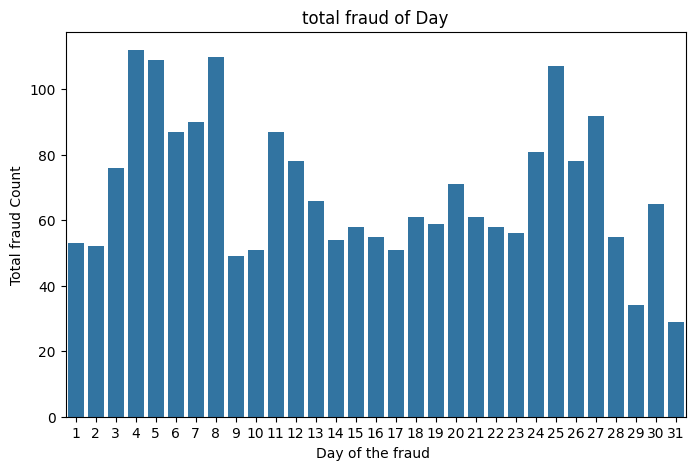

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

Month = df.groupby("day")["is_fraud"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="day", y="is_fraud", data=Month)
plt.title('total fraud of Day')
plt.xlabel('Day of the fraud ')
plt.ylabel('Total fraud Count')
plt.show()

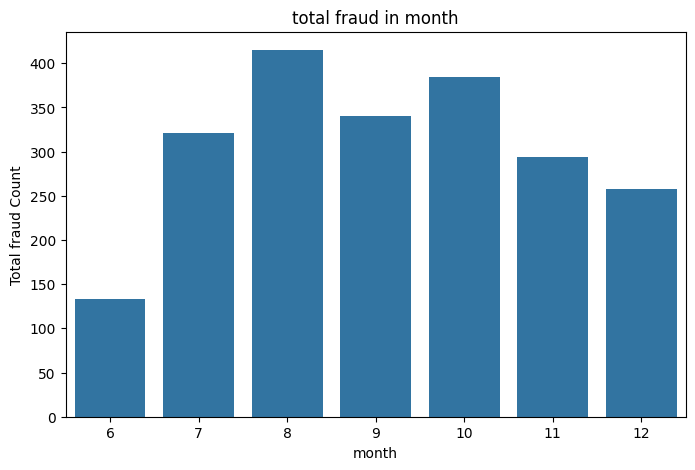

In [58]:
Month = df.groupby("month")["is_fraud"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="month", y="is_fraud", data=Month)
plt.title('total fraud in month')
plt.xlabel('month')
plt.ylabel('Total fraud Count')
plt.show()

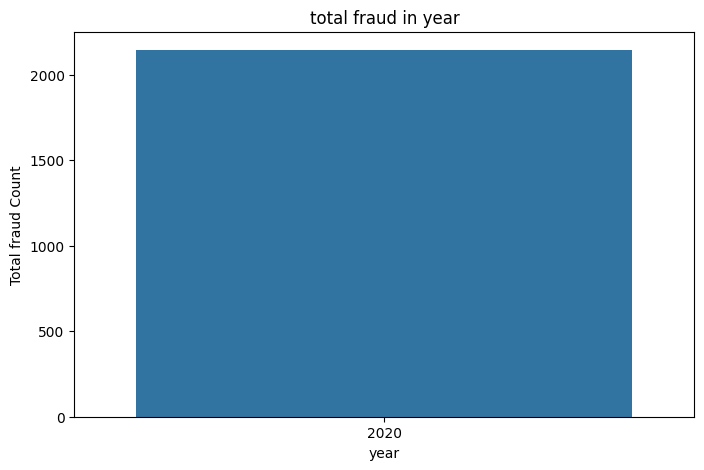

In [59]:
Month = df.groupby("year")["is_fraud"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="year", y="is_fraud", data=Month)
plt.title('total fraud in year')
plt.xlabel('year')
plt.ylabel('Total fraud Count')
plt.show()

## Spliting Data for training and Testing

In [60]:
x = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print("Shape of x_train : " , x_train.shape)
print("Shape of x_test : " , x_test.shape)
print("Shape of y_train : " , y_train.shape)
print("Shape of y_test : " , y_test.shape)

Shape of x_train :  (444575, 13)
Shape of x_test :  (111144, 13)
Shape of y_train :  (444575,)
Shape of y_test :  (111144,)


## Feature Scalling


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [62]:
x_train[:2]

array([[-1.32285479, -0.31566633,  0.05463652, -1.22097908,  0.45821478,
         0.76427221, -0.28631603, -1.33198286,  0.44375919,  0.82983972,
        -0.38601088, -1.26811292,  0.        ],
       [-0.18111638, -0.3189799 ,  0.10879199,  0.80816593, -1.63919947,
        -0.16658059, -0.28895636, -0.19309043, -1.56517221, -0.10162003,
         0.39574431, -0.25726285,  0.        ]])

In [63]:
sc.mean_

array([ 2.77877100e+05,  4.17820328e+17,  6.94560061e+01,  4.88259871e+04,
        3.85387719e+01, -9.02161997e+01,  8.80466027e+04,  1.38067947e+09,
        3.85389637e+01, -9.02157289e+01,  1.64564224e+01,  9.50900298e+00,
        2.02000000e+03])

In [64]:
sc.scale_

array([1.60471958e+05, 1.30984945e+18, 1.53816417e+02, 2.68571244e+04,
       5.05598738e+00, 1.37110829e+01, 3.00341554e+05, 5.20254840e+06,
       5.08960338e+00, 1.37226595e+01, 8.95420974e+00, 1.97853278e+00,
       1.00000000e+00])

In [65]:
df.shape

(555719, 14)

## Training Machine Learning Model

In [67]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)

In [68]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))

Logistic Regression Accuracy: 0.9959961851292017
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110731
           1       0.00      0.00      0.00       413

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Logistic Regression Confusion Matrix:
 [[110699     32]
 [   413      0]]


In [69]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)

In [70]:
# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Accuracy: 0.9955553156265745
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110731
           1       0.41      0.47      0.44       413

    accuracy                           1.00    111144
   macro avg       0.71      0.74      0.72    111144
weighted avg       1.00      1.00      1.00    111144

Decision Tree Confusion Matrix:
 [[110454    277]
 [   217    196]]


In [72]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)


In [73]:
# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Accuracy: 0.9981375512848197
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110731
           1       0.94      0.54      0.68       413

    accuracy                           1.00    111144
   macro avg       0.97      0.77      0.84    111144
weighted avg       1.00      1.00      1.00    111144

Random Forest Confusion Matrix:
 [[110716     15]
 [   192    221]]


In [74]:
# Compare the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, lr_predictions), accuracy_score(y_test, dt_predictions), accuracy_score(y_test, rf_predictions)]

In [75]:
# Print the model comparison
for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.9960
Decision Tree: 0.9956
Random Forest: 0.9981


## Save the model to test by other data 

In [80]:
import joblib
# Save the model to a file
joblib_file = "credit-card-fraud-detection.joblib"
joblib.dump(model, joblib_file)

['credit-card-fraud-detection.joblib']

**If we want to use this model again for making predictions on other data related to real world that is extracted from the users we can use by using this code**